Federal University of Rio Grande do Norte

Data Science - 2020.6

Teaching intern [Andressa Stéfany](https://github.com/AndressaStefany)

# Creating a Dash app with Google Colab

Dash is a productive Python framework for building web analytic applications.

Written on top of Flask, Plotly.js, and React.js, Dash is ideal for building data visualization apps with highly custom user interfaces in pure Python. It's particularly suited for anyone who works with data in Python.

For more informations [click here](https://dash.plotly.com/introduction).

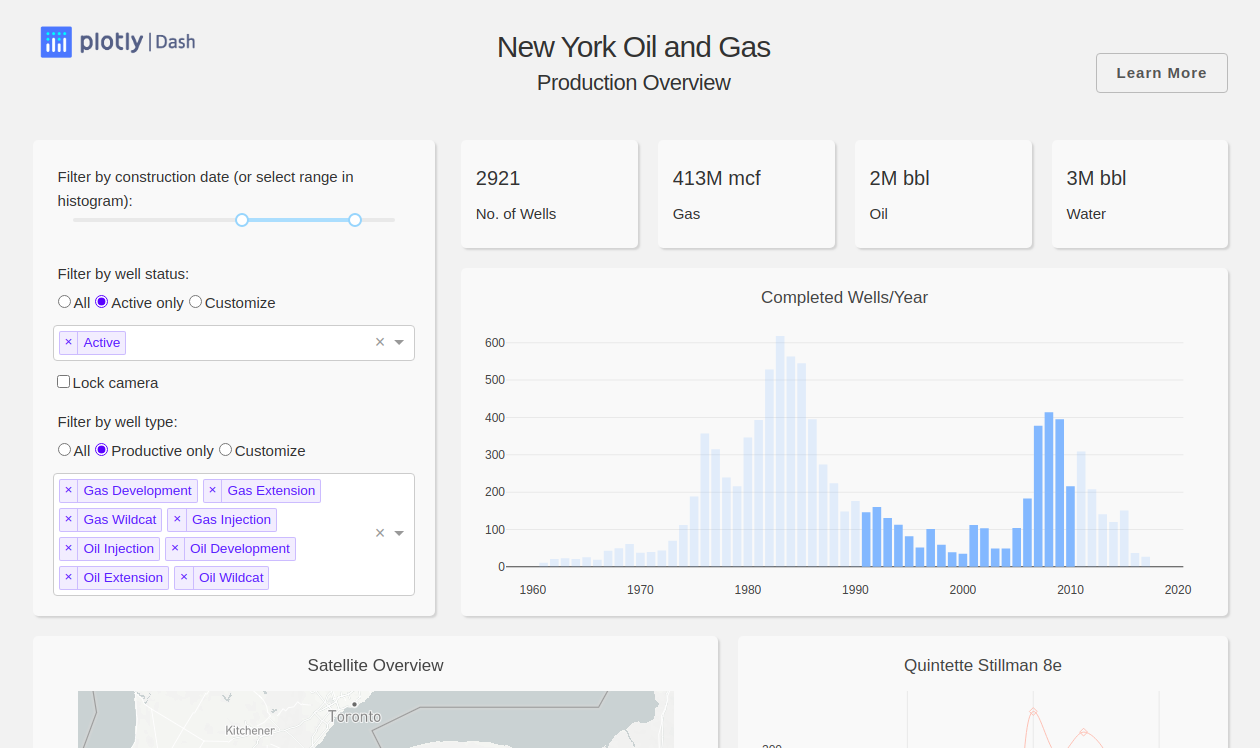

# 1.0 Import Libraries

In [1]:
# Install Plotly
!pip install Plotly==4.12

# Install Dash
!pip install dash
!pip install dash-html-components
!pip install dash-core-components
!pip install dash-table

     |████████████████████████████████| 13.1MB 289kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 81kB 2.2MB/s 
     |████████████████████████████████| 1.0MB 8.5MB/s 
     |████████████████████████████████| 3.5MB 20.9MB/s 
     |████████████████████████████████| 194kB 41.5MB/s 
     |████████████████████████████████| 1.8MB 29.5MB/s 
     |████████████████████████████████| 358kB 39.0MB/s 
  Created wheel for dash: filename=dash-1.17.0-cp36-none-any.whl size=83728 sha256=777d8d4b29d2ce52b3ccb4c3bc3042963400fe33465cae78506bb39dcc78e277
  Stored in directory: /root/.cache/pip/wheels/e0/32/13/8a569b638a79cf80a4a721f56040d91198adec28e3bc8123fc
  Created wheel for flask-compress: filename=Flask_Compress-1.7.0-cp36-none-any.whl size=6833 sha256=e23ad6ff78e8603478f3cb0311b1a6d07c48281041ff173aab347870f19ece64
  Stored in directory: /root/.cache/pip/wheels/1d/b7/18/2b88ed33c5ef538

In [2]:
import os.path
import sys, json
import requests
import subprocess

import numpy as np
import pandas as pd
import plotly.express as px

from requests.exceptions import RequestException
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

from collections import namedtuple

# 2.0 Configuring the Ngrok

[Ngrok](https://ngrok.com/) will be used to create the Dash app URL.

First, you need to download of Ngrok. The function below downloads and starts the external URL creation process:

In [8]:
def download_ngrok():
    if not os.path.isfile('ngrok'):
        !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
        !unzip -o ngrok-stable-linux-amd64.zip
    pass

In [9]:
Response = namedtuple('Response', ['url', 'error'])

def get_tunnel():
    try:
        Tunnel = subprocess.Popen(['./ngrok','http','8050'])

        session = requests.Session()
        retry = Retry(connect=3, backoff_factor=0.5)
        adapter = HTTPAdapter(max_retries=retry)
        session.mount('http://', adapter)

        res = session.get('http://localhost:4040/api/tunnels')
        res.raise_for_status()

        tunnel_str = res.text
        tunnel_cfg = json.loads(tunnel_str)
        tunnel_url = tunnel_cfg['tunnels'][0]['public_url']

        return Response(url=tunnel_url, error=None)
    except RequestException as e:
        return Response(url=None, error=str(e))

# 3.0 The Dash apps

Dash apps are composed of [layout](https://dash.plotly.com/layout), it describes what the application looks like, and [interactivity](https://dash.plotly.com/basic-callbacks) of the application.

For layout, We will use the `dash_core_components` and the `dash_html_components` library. But you can use also build your own with JavaScript and React.js.


- The layout is composed of componenets like `html.Div` and `dcc.Graph`.
- The `dash_core_components` library has components for every HTML tag. For example: Div, H6 and Br.
- The `dash_html_components`library describe components that are interactive. For example: Graph, Input and Slider.

But, first we will work with the graph we want and then we will work with Dash:

In [3]:
# dataset example
df = pd.DataFrame(data={'centroid_lat':[-5.831919],
                        'centroid_lon':[-35.205504],
                        'approxim':[50],
                        'text':['IMD']})
df

,centroid_lat,centroid_lon,approxim,text
0,-5.831919,-35.205504,50,IMD


In [5]:
fig = px.scatter_mapbox(df, 
                        lat='centroid_lat', 
                        lon='centroid_lon', 
                        text='text',
                        size='approxim',
                        size_max=40, 
                        zoom=15,
                        mapbox_style='carto-positron')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
fig.show()

The final script:

In [6]:
%%writefile my_dash_app.py
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.DataFrame(data={'centroid_lat':[-5.831919],
                        'centroid_lon':[-35.205504],
                        'approxim':[50],
                        'text':['IMD']})

fig = px.scatter_mapbox(df, 
                        lat='centroid_lat', 
                        lon='centroid_lon', 
                        text='text',
                        size='approxim',
                        size_max=40, 
                        zoom=15,
                        mapbox_style='carto-positron')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})

app.layout = html.Div([
    dcc.Graph(
        id='life-exp-vs-gdp',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Writing my_dash_app.py


Run the dash app:

In [10]:
download_ngrok()

--2020-11-01 21:37:32--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.164.152.149, 52.54.245.245, 52.205.86.27, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.164.152.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  46.5MB/s    in 0.3s    

2020-11-01 21:37:32 (46.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [12]:
retorno = get_tunnel()
print(retorno)
!python my_dash_app.py

Response(url='https://412ffd76e2b3.ngrok.io', error=None)
Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "my_dash_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/distributed/_concurrent_futures_thread.py", line 42, in _python_exit
    items = list(_threads_queues.items())
KeyboardInterrupt


In case you want to build a dash with user interaction, use [Dash Callbacks](https://dash.plotly.com/basic-callbacks).

# Reference

* [Video: Tableros Dash en Colab y tuneles con ngrok](https://www.youtube.com/watch?v=g6M3mAHFcyU)
*   [ngrok](https://ngrok.com/)
*   [Dash Plotly](https://dash.plotly.com/)
*   [Interactive Graphing](https://dash.plotly.com/interactive-graphing)
*   [Dash for Beginners - DataCamp](https://www.datacamp.com/community/tutorials/learn-build-dash-python)
